<a href="https://colab.research.google.com/github/Jilaniewu/Projects/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
print(mnist)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

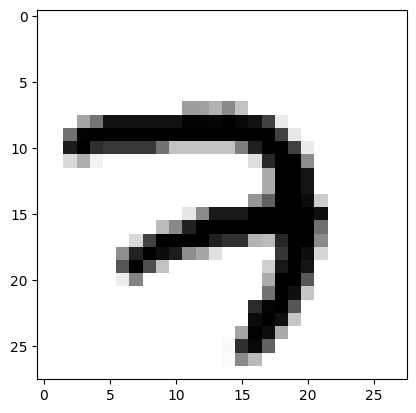

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

X,y = mnist['data'],mnist['target']
random_digit = X.iloc[5000].to_numpy()
random_digit_image =random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [ ]:
x_train, x_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [ ]:
import numpy as np

shuffle_index = np.random.permutation(6000)
x_train,y_train =x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)
print(y_test_2)

6000    False
6001    False
6002    False
6003    False
6004    False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: class, Length: 1000, dtype: bool


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=5000, verbose=0, tol=0.1)
clf.fit(x_train.values,y_train_2)
clf.predict([random_digit])

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")
a.mean()

0.9525

In [ ]:
from sklearn import svm
cls = svm.SVC()
cls.fit(x_train.values, y_train_2)
cls.predict([random_digit])

array([False])

In [ ]:
a=cross_val_score(cls, x_train, y_train_2, cv = 3,scoring="accuracy")
print(a.mean())

0.9860000000000001
